In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

Data Collection and Data Cleaning

In [2]:
data=pd.read_csv('Dataset/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Label Encoding

In [5]:
#Label spam mail as 1; ham mail as 0

In [6]:
encoder=LabelEncoder()
data['Category']=encoder.fit_transform(data['Category'])

In [7]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Checking for missing values
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
#Checking and Removing Duplicates
data.duplicated().sum()

415

In [10]:
 data=data.drop_duplicates(keep='first')

In [11]:
data.duplicated().sum()
data.info

<bound method DataFrame.info of       Category                                            Message
0            0  Go until jurong point, crazy.. Available only ...
1            0                      Ok lar... Joking wif u oni...
2            1  Free entry in 2 a wkly comp to win FA Cup fina...
3            0  U dun say so early hor... U c already then say...
4            0  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         1  This is the 2nd time we have tried 2 contact u...
5568         0               Will ü b going to esplanade fr home?
5569         0  Pity, * was in mood for that. So...any other s...
5570         0  The guy did some bitching but I acted like i'd...
5571         0                         Rofl. Its true to its name

[5157 rows x 2 columns]>

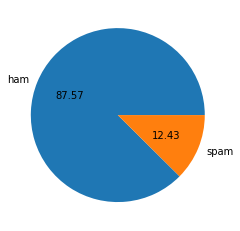

In [12]:
#Check percentage of spam and ham in dataset
plt.pie(data['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
## Data Pre-processing
    #1. Lower Case
    #2. Tokenization
    #3. Removing special characters
    #4. Removing stop words and punctuation
    #5. Stemming

In [14]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps=PorterStemmer()

In [15]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    

In [16]:
t=transform_text("hello WORLD %% 99 how r u dancing")
print(t)

hello world 99 r u danc


In [17]:
#Creating a new column of transformed text
data['transformed_text']=data['Message'].apply(transform_text)

In [18]:
data.head()

,Category,Message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


Using wordcloud to show top words in spam and ham mails respectively

Text(0.5, 1.0, 'Spam Word Cloud')

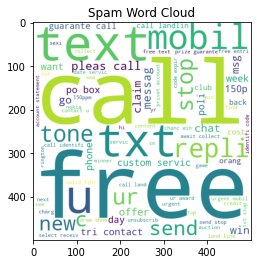

In [19]:
wc=WordCloud(width=500,height=500, min_font_size=10,background_color='white')
spam_wc=wc.generate(data[data['Category']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.title('Spam Word Cloud')

Text(0.5, 1.0, 'Ham Word Cloud')

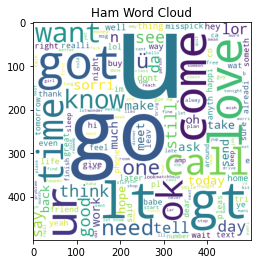

In [20]:
ham_wc=wc.generate(data[data['Category']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.title('Ham Word Cloud')

Separating the data as texts and label

In [21]:
#vectorizing the data
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(data['transformed_text']).toarray()
y=data['Category'].values

In [22]:
x.shape

(5157, 6781)

In [23]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
#Splitting the dataset into Train And Test Dataset

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Building and Training the Model

In [26]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()

In [27]:
modelLR.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred=modelLR.predict(x_test)

In [29]:
#Evaluating the model
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9505813953488372
[[902   3]
 [ 48  79]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       905
           1       0.96      0.62      0.76       127

    accuracy                           0.95      1032
   macro avg       0.96      0.81      0.86      1032
weighted avg       0.95      0.95      0.95      1032



In [30]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=5)


In [31]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [32]:
y_pred1=RF.predict(x_test)

In [33]:
#Evaluating the model
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))


0.876937984496124
[[905   0]
 [127   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       905
           1       0.00      0.00      0.00       127

    accuracy                           0.88      1032
   macro avg       0.44      0.50      0.47      1032
weighted avg       0.77      0.88      0.82      1032



c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [34]:
#Multinomial Classifier
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

In [35]:
MNB.fit(x_train,y_train)
y_pred2=MNB.predict(x_test)

In [36]:
#Evaluating the Model
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.9612403100775194
[[905   0]
 [ 40  87]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       1.00      0.69      0.81       127

    accuracy                           0.96      1032
   macro avg       0.98      0.84      0.90      1032
weighted avg       0.96      0.96      0.96      1032



In [37]:
#Saving the model

In [38]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(MNB,open('model.pkl','wb'))

In [39]:
#Building a Predictive System

In [40]:
#Loading the built models and the vectorizer
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [41]:
def predSystem(input_sms):
 #Converting the text into feature vector   
        #1. Transforming the input
    transformed_sms = transform_text(input_sms)
        # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
        # 3. predict
    result = model.predict(vector_input)[0]
    return result

In [42]:
#Calling the function for prediction
input_sms="WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
result=predSystem(input_sms)
if result==1:
    print("Spam")
elif result==0:
    print("Ham")

Spam


In [43]:
#Calling the function for prediction
input_sms="Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
result=predSystem(input_sms)
if result==1:
    print("Spam")
elif result==0:
    print("Ham")

Ham
